# Fruit Classification with VGG-16: Baseline and Modified Architectures

This project focuses on developing a deep learning model for multiclass fruit classification. The baseline architecture is based on VGG-16, and a modified version of the model is created to improve classification accuracy. By comparing the results of both models, we aim to enhance the performance of fruit classification tasks.

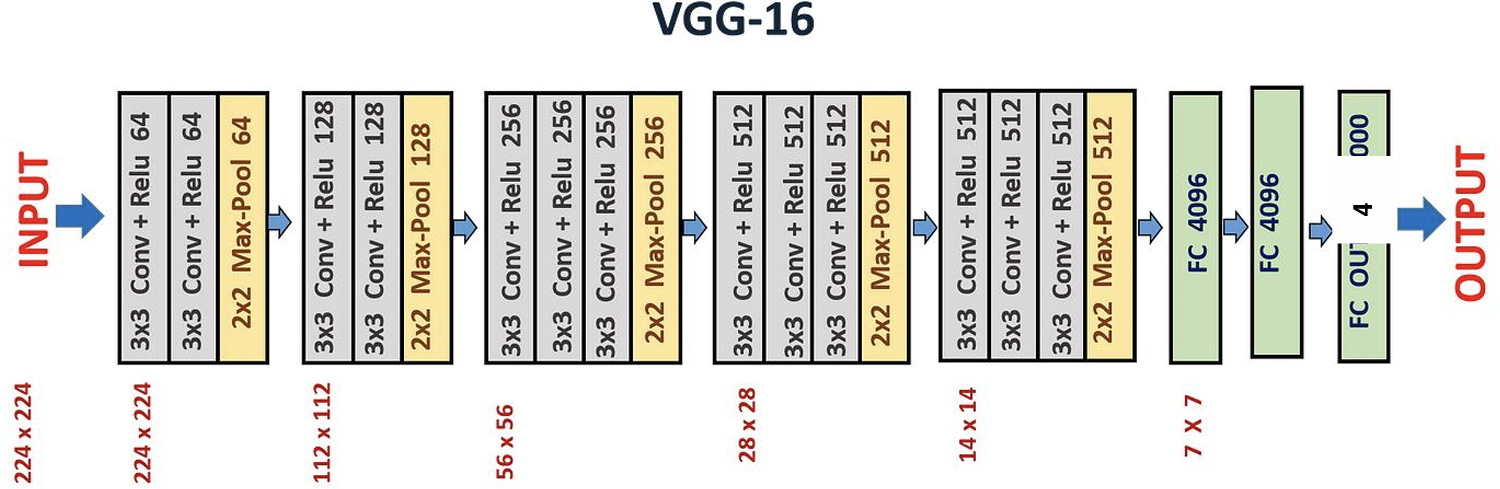

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Exploration, Resolution Resize, & Data Splitting

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

##### Data Exploration

This code below is to define the google drive path and gives an overview about the fruit types present in the dataset

In [3]:
dataset_path = '/content/drive/MyDrive/Dataset2A/Dataset2A'

fruit_types = os.listdir(dataset_path)

print("Types of fruits found:", fruit_types)
print("Total number of fruit types:", len(fruit_types))

Types of fruits found: ['acai', 'avocado', 'acerola', 'apple']
Total number of fruit types: 4


This code below is to show the number of image

In [4]:
import pathlib
dataset_path = pathlib.Path(dataset_path)
image_length = len(list(dataset_path.glob('*/*.jpg')))
image_length

1600

In [5]:
fruit_image = {
    'acai': list(dataset_path.glob('acai/*')),
    'acerola': list(dataset_path.glob('acerola/*')),
    'apple': list(dataset_path.glob('apple/*')),
    'avocado': list(dataset_path.glob('avocado/*'))
}

fruit_image_index = {
    'acai': 0,
    'acerola': 1,
    'apple': 2,
    'avocado': 3
}

This part is to give an overview picture for each of the 4 fruits in the dataset

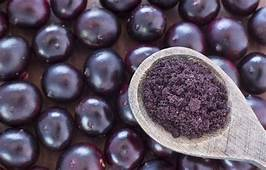

In [6]:
PIL.Image.open(str(list(dataset_path.glob('acai/*'))[0]))

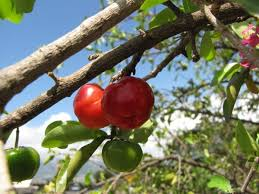

In [7]:
PIL.Image.open(str(list(dataset_path.glob('acerola/*'))[0]))

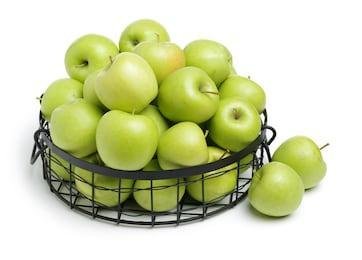

In [8]:
PIL.Image.open(str(list(dataset_path.glob('apple/*'))[0]))

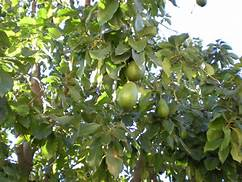

In [9]:
PIL.Image.open(str(list(dataset_path.glob('avocado/*'))[0]))

Color Histogram

In [10]:
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt

def color_histogram(nameOfFruits, dataPath, hist_type='bar', background_color='white'):
    fig, axs = plt.subplots(len(nameOfFruits), 1, figsize=(10, 5 * len(nameOfFruits)))

    for i, fruitName in enumerate(nameOfFruits):
        fruit_folder = os.path.join(dataPath, fruitName)
        image_files = os.listdir(fruit_folder)
        image_path = os.path.join(fruit_folder, image_files[0])
        image = PIL.Image.open(image_path)
        image_array = np.array(image)

        color_labels = ['Red', 'Green', 'Blue']
        colors = ['r', 'g', 'b']

        for j, (color, label) in enumerate(zip(colors, color_labels)):
            color_values = image_array[:,:,j].flatten()
            if hist_type == 'stacked':
                axs[i].hist(color_values, bins=256, color=color, alpha=0.5, label=label, stacked=True)
            elif hist_type == 'bar':
                axs[i].hist(color_values, bins=256, color=color, alpha=0.5, label=label)
            else:
                raise ValueError("Invalid histogram type. Use 'stacked' or 'bar'.")

        axs[i].set_xlabel('intensity')
        axs[i].set_ylabel('frequency')
        axs[i].set_title(f'{fruitName} Color Histogram')
        axs[i].set_facecolor(background_color)

    plt.tight_layout()
    plt.show()


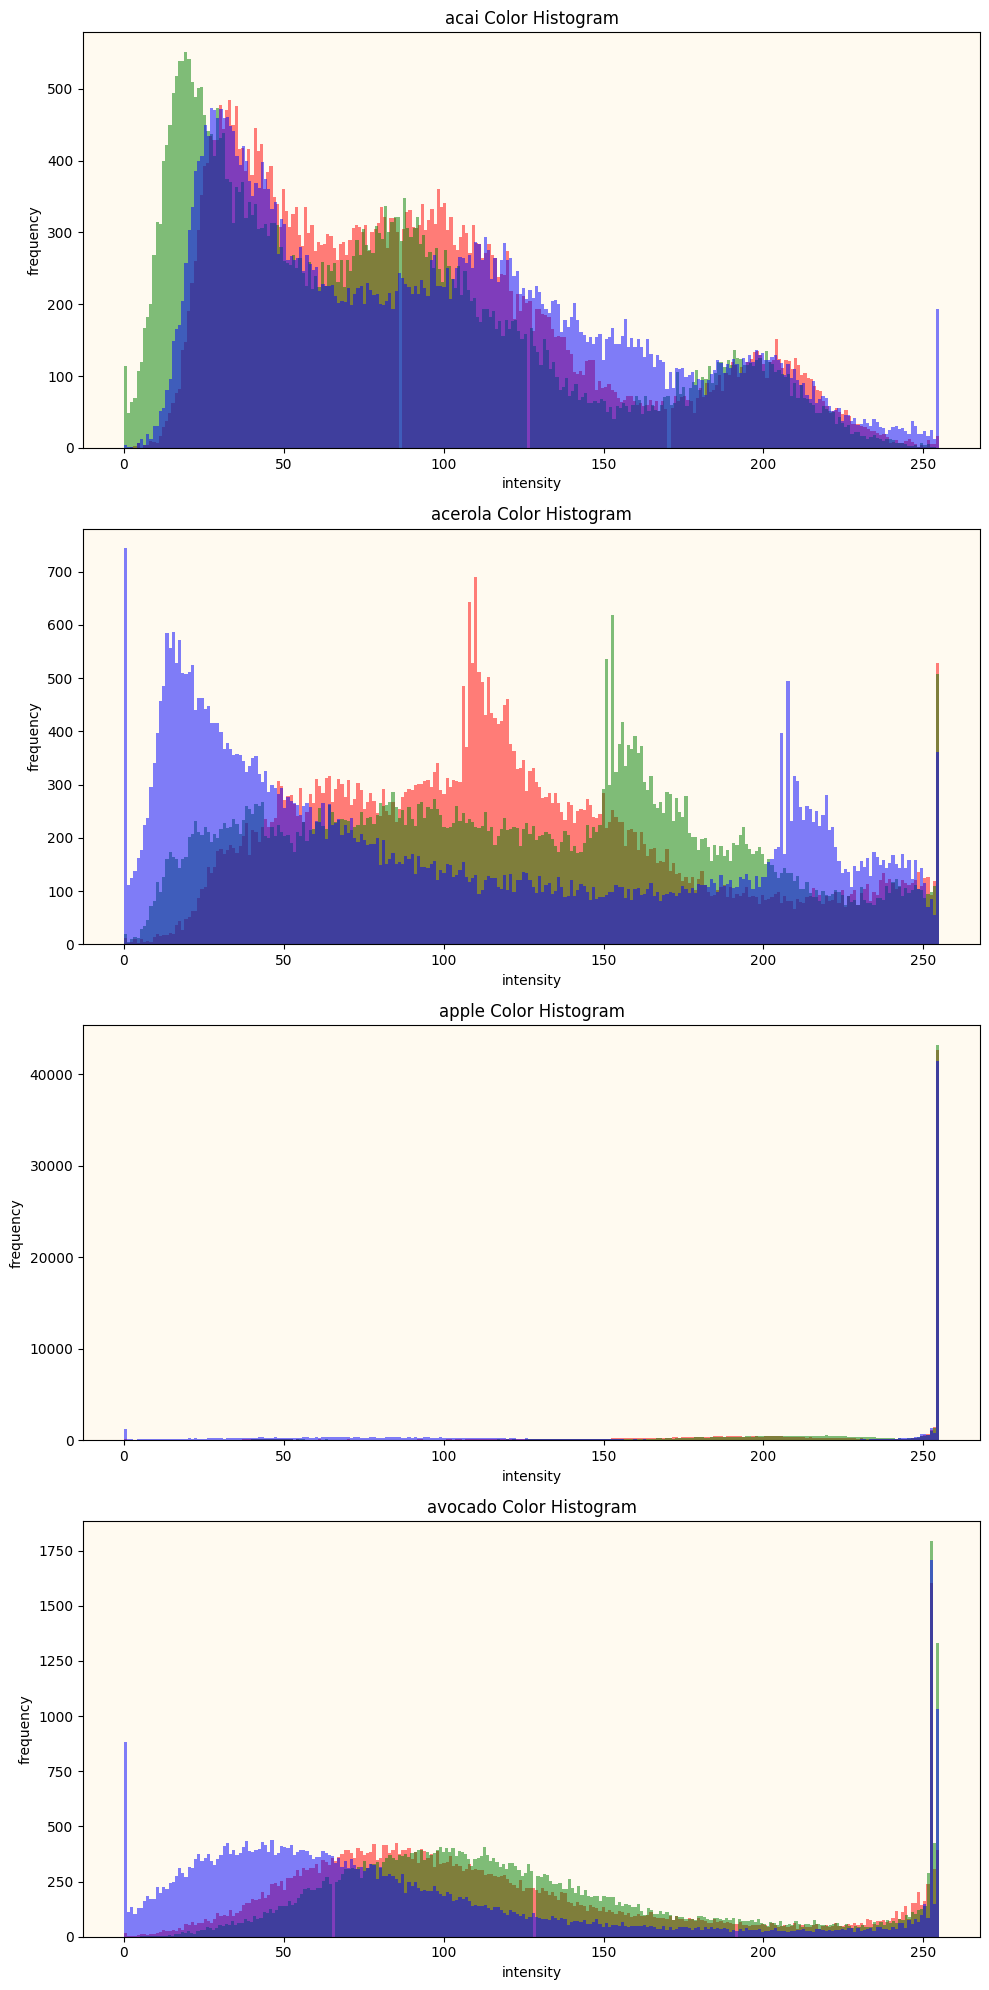

In [11]:
fruits = ['acai', 'acerola', 'apple', 'avocado']
color_histogram(fruits, dataset_path, hist_type='stacked', background_color='floralwhite')

Color Intensity Explanation:
- `Acai Histogram:` The histogram predominantly displays shades of blue, with other colors exhibiting high intensities as well, although blue remains the dominant hue. This distribution demonstrates a balanced spread of colors.

- `Acerola Histogram:` Similar to the Acai histogram, blue is the dominant color, showcasing a well-balanced distribution of hues.

- `Apple Histogram:` The histogram indicates a strong presence of high-intensity blue shades, with a noticeable skew towards the right, suggesting a less optimal color distribution.

- `Avocado Histogram:` This histogram showcases a mild balance in color distribution, with a prominent peak in blue intensity around 250 units and a high frequency of occurrence, reaching 1750 instances.

##### Picture Resolution Resize & Splitting Data

In [12]:
import cv2
fruit_classes = os.listdir(dataset_path)

images = []
labels = []

for idx, fruit_class in enumerate(fruit_classes):
    class_path = os.path.join(dataset_path, fruit_class)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img_rgb)
        labels.append(idx)

images = np.array(images)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Jumlah data training:", len(X_train))
print("Jumlah data validation:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1280
Jumlah data validation: 160
Jumlah data test: 160


In [13]:
images.shape

(1600, 224, 224, 3)

In [14]:
labels.shape

(1600,)

In [15]:
print(f"Train x Shape : {X_train.shape}")
print(f"Train y Shape : {y_train.shape}")
print(f"Test x Shape : {X_test.shape}")
print(f"Test y Shape : {y_test.shape}")
print(f"Validation x Shape : {X_val.shape}")
print(f"Validation y Shape : {y_val.shape}")

Train x Shape : (1280, 224, 224, 3)
Train y Shape : (1280,)
Test x Shape : (160, 224, 224, 3)
Test y Shape : (160,)
Validation x Shape : (160, 224, 224, 3)
Validation y Shape : (160,)


### Challenges & Difficulties


Factors influencing Image Quality and their relationship are:

- `Resolution:`<br>
Relationship with Quality: Higher resolution tends to produce sharper and clearer images. Higher resolution captures more details in the image.<br>
Impact on Quality: Low-resolution images may appear blurry, lack detail, and be less sharp.
- `Noise:`<br>
Relationship with Quality: Noise reduces image sharpness and detail. Higher noise levels result in poorer image quality.<br>
Impact on Quality: Noise can degrade image quality by making it look coarse or grainy, especially in low-contrast areas or shadows.
- `Lighting:`<br>
Relationship with Quality: Good lighting can enhance image quality by highlighting details and colors clearly.<br>
Impact on Quality: Poor lighting can make images look dark, overly shadowed, or overexposed, all of which can reduce image quality.
- `Perspective and Angle:`<br>
Relationship with Quality: Perspective and shooting angle can affect the composition and aesthetics of an image.<br>
Impact on Quality: Proper shooting angles can enhance image quality by optimally highlighting main objects. Improper angles or disproportionate perspectives can make images look unbalanced or unappealing.
- `Background Variability:`<br>
Relationship with Quality: Varied backgrounds can add depth and dimension to an image, providing richer context.<br>
Impact on Quality: Cluttered or busy backgrounds can distract attention from the main subject, reducing image quality.
- `Occlusions:`<br>
Relationship with Quality: Occlusions refer to objects or elements partially blocking the view of the main subject in an image. They can impact the overall clarity and completeness of the image.
<br>Impact on Quality: Occlusions can reduce image quality by obstructing essential details or introducing distractions. Partially hidden objects or elements can create visual clutter, affecting the image's overall appeal and interpretability.<br><br>
In summary, high resolution, low noise levels, good lighting, appropriate perspective and angles, and varied backgrounds all contribute to good image quality. Each factor needs to be carefully considered and adjusted to achieve high-quality images.

All image size is already set into 224x224x3 in the previous code before splitting the data.

##### Image Noise

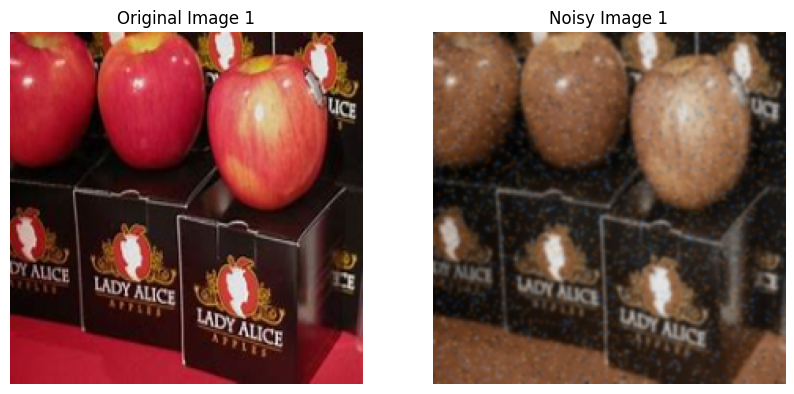

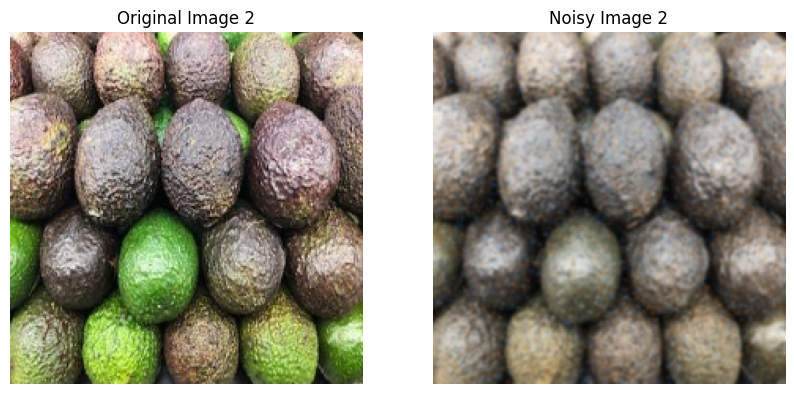

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

def plot_image_with_noise(image, noise_image, title1='Original Image', title2='Noisy Image'):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(noise_image)
    plt.title(title2)
    plt.axis('off')

    plt.show()

def check_noise(X_train, num_samples=2):
    for i in range(num_samples):
        image = X_train[i]
        noise_image = random_noise(image, mode='s&p', seed=42)
        denoised_image = gaussian_filter(noise_image, sigma=1)
        plot_image_with_noise(image, denoised_image, f'Original Image {i+1}', f'Noisy Image {i+1}')

check_noise(X_train)

This picture proofs that there are noises present in the training data

##### Image Variability

Comparing Image Variability
Class: acai


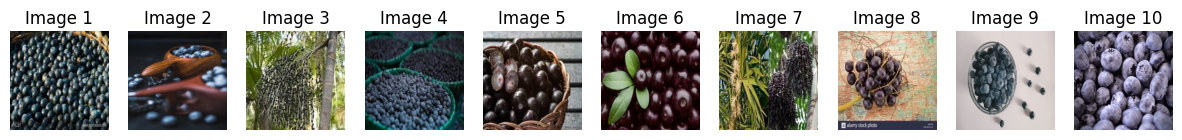

Class: avocado


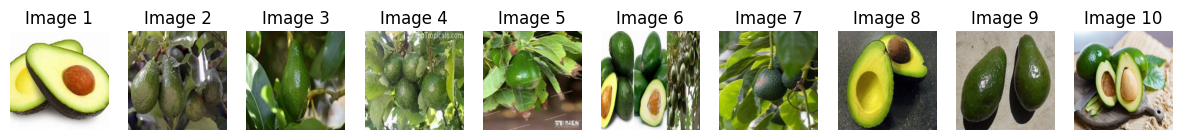

Class: acerola


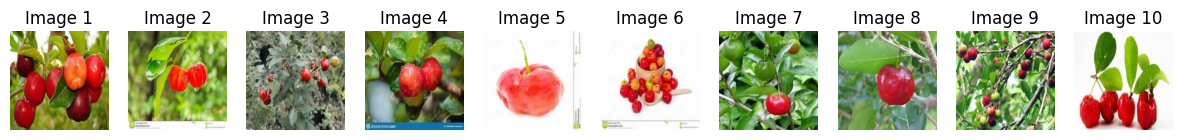

Class: apple


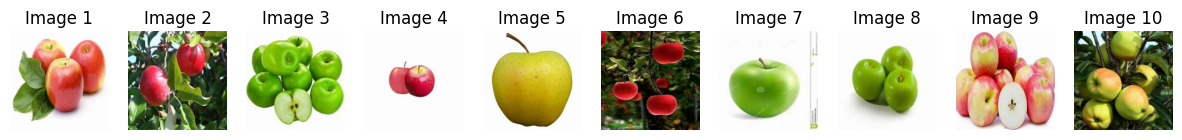

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def compare_perspective_and_angle(X_train, y_train, class_names, num_samples=10):
    print("Comparing Image Variability")
    for i, class_name in enumerate(class_names):
        class_images = X_train[y_train == i]
        print(f"Class: {class_name}")

        sample_indices = np.random.choice(len(class_images), num_samples, replace=False)
        sample_images = class_images[sample_indices]

        plt.figure(figsize=(15, 5))
        for j in range(num_samples):
            plt.subplot(1, num_samples, j + 1)
            plt.imshow(sample_images[j])
            plt.title(f"Image {j + 1}")
            plt.axis('off')
        plt.show()

compare_perspective_and_angle(X_train, y_train, fruit_types)

All of these picture already can give an explanation for 4 image variability measure.
- `Perspective and Angle:` Each image is captured from a unique perspective and angle. Some are taken from the front, providing a direct view, while others are captured from the top or other angles, offering different viewpoints and enhancing visual interest.
- `Occlusions:` There are no instances where the fruit objects are blocked or obscured by other objects in the images. This absence of occlusions ensures clear visibility of the main subject in each image, contributing to better interpretability and visual appeal.
- `Background Variability:` The images showcase variability in backgrounds, ranging from white, green, gray, etc. This diversity in backgrounds adds depth and context to each image, creating visual interest and enhancing the overall composition.
- `Scale Variations:` Each image also exhibits scale variations, indicating that the scale for each fruit is different. This variability in scale reflects the natural differences in size among fruits, further emphasizing the authenticity and realism of the images.

### Baseline Architecture

The baseline architecture I built is based on the VGG-16 architecture mentioned in the question sheet. This means I started with a strong foundation inspired by VGG-16's architecture. Using this architecture helps me to make a base for my problem and later on will be easier to make future improvements and optimizations to the model.

In [18]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


tf.random.set_seed(42)

model_baseline = keras.Sequential()

model_baseline.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu",
                 input_shape=(224, 224, 3)))
model_baseline.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Flatten())
model_baseline.add(Dense(4096, activation="relu"))
model_baseline.add(Dense(4096, activation="relu"))
model_baseline.add(Dense(4, activation="softmax"))

model_baseline.build()
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [19]:
model_baseline.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
import tensorflow as tf
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

history = model_baseline.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

val_loss, val_accuracy = model_baseline.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

test_loss, test_accuracy = model_baseline.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
40/40 [==============================] - 43s 413ms/step - loss: 114.4709 - accuracy: 0.2359 - val_loss: 1.3848 - val_accuracy: 0.2625
Epoch 2/10
40/40 [==============================] - 16s 409ms/step - loss: 1.3965 - accuracy: 0.2477 - val_loss: 1.3863 - val_accuracy: 0.2688
Epoch 3/10
40/40 [==============================] - 17s 416ms/step - loss: 1.4489 - accuracy: 0.2438 - val_loss: 1.3856 - val_accuracy: 0.2688
Epoch 4/10
40/40 [==============================] - 17s 425ms/step - loss: 1.4037 - accuracy: 0.2547 - val_loss: 1.3736 - val_accuracy: 0.4187
Epoch 5/10
40/40 [==============================] - 17s 434ms/step - loss: 1.3857 - accuracy: 0.3031 - val_loss: 1.3858 - val_accuracy: 0.2625
Epoch 6/10
40/40 [==============================] - 17s 437ms/step - loss: 1.3866 - accuracy: 0.2555 - val_loss: 1.3376 - val_accuracy: 0.4563
Epoch 7/10
40/40 [==============================] - 17s 432ms/step - loss: 1.3829 - accuracy: 0.3680 - val_loss: 1.4606 - val_accuracy: 0.20

### Modified Architecture & Model Evaluation

From the baseline architecture, I modified the architecture by adding a batch normalization layer for normalizing the activations of the previous layer and improving the training speed and stability. Additionally, I incorporated dropout layers for reducing overfitting by randomly dropping neurons during training, enhancing the model's generalization capabilities.

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow.keras as keras

tf.random.set_seed(42)

model_baseline = keras.Sequential()

# Block
model_baseline.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu",
                 input_shape=(224, 224, 3)))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
model_baseline.add(BatchNormalization())
model_baseline.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Dense Layer
model_baseline.add(Flatten())
model_baseline.add(Dense(4096, activation="relu"))
model_baseline.add(Dropout(0.2))
model_baseline.add(Dense(4096, activation="relu"))
model_baseline.add(Dropout(0.2))
model_baseline.add(Dense(4, activation="softmax")) # 4 class buah

model_baseline.build()
model_baseline.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                      

In [22]:
model_baseline.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model_baseline.fit(X_train, y_train,
                              epochs=10,
                              batch_size=32,
                              validation_data=(X_val, y_val))

val_loss, val_accuracy = model_baseline.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

test_loss, test_accuracy = model_baseline.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
40/40 [==============================] - 31s 546ms/step - loss: 21.0246 - accuracy: 0.4313 - val_loss: 100452.5859 - val_accuracy: 0.2625
Epoch 2/10
40/40 [==============================] - 22s 547ms/step - loss: 2.3842 - accuracy: 0.5883 - val_loss: 3001.7144 - val_accuracy: 0.2625
Epoch 3/10
40/40 [==============================] - 21s 526ms/step - loss: 2.2841 - accuracy: 0.6047 - val_loss: 16.1550 - val_accuracy: 0.4250
Epoch 4/10
40/40 [==============================] - 22s 540ms/step - loss: 0.9697 - accuracy: 0.6922 - val_loss: 4.3744 - val_accuracy: 0.5063
Epoch 5/10
40/40 [==============================] - 21s 529ms/step - loss: 0.7301 - accuracy: 0.7375 - val_loss: 1.0368 - val_accuracy: 0.7250
Epoch 6/10
40/40 [==============================] - 21s 533ms/step - loss: 0.7212 - accuracy: 0.7461 - val_loss: 1.0291 - val_accuracy: 0.6812
Epoch 7/10
40/40 [==============================] - 21s 529ms/step - loss: 0.8601 - accuracy: 0.7625 - val_loss: 0.8094 - val_accura

After integrating the batch normalization layer and dropout layer, the noticeable increase in accuracy is a significant achievement. This enhancement underscores the importance of incorporating dropout layers and batch normalization into the deep learning model development process. These additions play a crucial role in refining the model's performance, ensuring it achieves optimal results.

1. Model 1 (Baseline Architecture):
- The training accuracy starts at a low value of 0.236 and gradually increases but remains relatively low at 0.2555 after ten epochs.
- The validation accuracy is also low, starting at 0.2625 and fluctuating slightly but not showing significant improvement over epochs.
- The test accuracy is 0.2375, which is consistent with the low validation accuracy, indicating limited generalization performance.
2. Model 2 (Modified Architecture):
- The training accuracy starts higher at 0.4313 and shows improvement over epochs, reaching 0.7102 by the end of ten epochs.
- The validation accuracy starts at 0.2625 but improves substantially to 0.6562 by the end of training, indicating better generalization compared to Model 1.
- The test accuracy is significantly higher at 0.7312, indicating good generalization performance and effectiveness of the modifications.

**Insights:**

- Model 2, with the modified architecture including dropout layers and batch normalization, shows substantial improvements in both training and validation accuracy compared to Model 1.
- The addition of dropout layers helps prevent overfitting by randomly dropping units during training, which is reflected in the improved generalization performance of Model 2.
- Batch normalization contributes to stabilizing and accelerating the training process, allowing the model to learn more efficiently and generalize better to unseen data.<br><br>
In summary, Model 2's modifications have led to significantly better performance in predicting fruit classification for Chaplin, demonstrating the importance of architectural enhancements like dropout layers and batch normalization in improving model accuracy and generalization.






